In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat # mat file
import scipy.special as sp # test
import pandas as pd # mat file
from scipy.signal import savgol_filter
plt.style.use('seaborn')

In [ ]:
def read_data(name):
    data = loadmat(f"./{name}.mat")
    S = data["S"].flatten()
    I = data["I"].flatten()
    R = data["R"].flatten()
    N = data["N"].flatten()
    t = data["t"].flatten()
    return t, S, I, R, N

def return_shuffled(matrix):
    mat = np.array(matrix).T
    np.random.shuffle(mat)
    #plt.scatter(mat[:,0], mat[:,1])
    t_new = mat[:,0]
    s_new = mat[:,1]
    return t_new, s_new
        

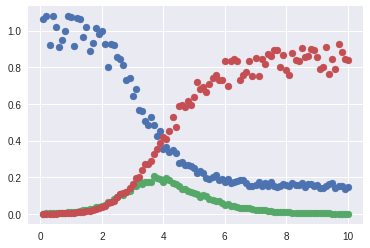

In [ ]:
#time, suc,_,_ = read_data("reto1")

#T, S= return_shuffled([time, suc])
# puede que randomizar el orden del arreglo ayude
# pero alch no sé

#T = time
#S = suc

T, S, I, R, N= read_data("reto1")

t_factor = 10
#v_factor = 1000

T = T/t_factor
S = S/N
I = I/N
R = R/N
N = N/N

plt.scatter(T, S)
plt.scatter(T, I)
plt.scatter(T, R)

In [ ]:
def get_fit(nodes, n_epochs, train_data, hidden_type):
    
    n_nodes = len(nodes)
    model = Sequential()
    # add
    model.add(Dense(nodes[0], input_dim=1, activation='relu'))
    # add dene networks
    for ii in range(1,n_nodes - 1):
        model.add(Dense(nodes[ii], activation=hidden_type))

    model.add(Dense(nodes[-1], activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mse'])

    model.fit(train_data[0], train_data[1], epochs=n_epochs, verbose=False)
    
    return model

def get_predictions(x, M):
    return M.predict(x, verbose=0).flatten()
    


In [ ]:
# we want the end node to be a single dim array
#n_layers = 5
# nodevec = [2**3,  120, 120, 20,  1] # da buenas formas
s_nodevec = [10, 64, 64, 20, 1]
i_nodevec = [10, 20, 120, 120, 120, 1]
r_nodevec = [4, 64, 120, 120,  1]

Smodel = get_fit(s_nodevec, n_epochs=128, train_data=[T, S], hidden_type=tf.nn.sigmoid) 
Imodel = get_fit(i_nodevec, n_epochs=128, train_data=[T, I], hidden_type=tf.nn.selu) 
Rmodel = get_fit(r_nodevec, n_epochs=128, train_data=[T, R], hidden_type=tf.nn.selu) 

ttest = np.linspace(0,10,1000)
stest = get_predictions(ttest, Smodel)
itest = get_predictions(ttest, Imodel)
rtest = get_predictions(ttest, Rmodel)

stest = N - itest - rtest
#stest = np.zeros(len(ttest))
#N = 10
#for ii in range(N):
#    stest += get_predictions(ttest, mod)
#stest = stest / N

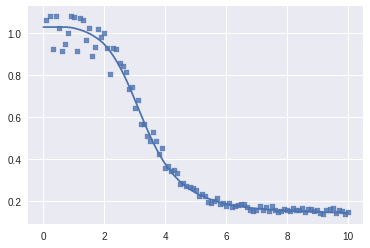

In [ ]:
s_nodevec = [120, 120, 120, 120, 64, 64, 1]
Smodel = get_fit(s_nodevec, n_epochs=128, train_data=[T, S], hidden_type=tf.nn.sigmoid) 
ttest = np.linspace(0,10,1000)
stest = get_predictions(ttest, Smodel)
plt.plot(ttest, stest)
plt.scatter(T, S, marker="s", s=25, alpha=0.8)

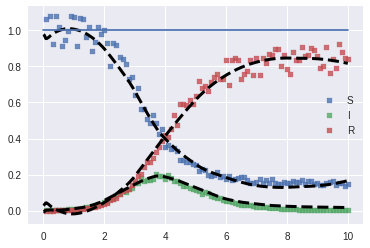

In [ ]:
plt.scatter(T, S, marker="s", s=25, alpha=0.8)
plt.scatter(T, I, marker="s", s=25, alpha=0.8)
plt.scatter(T, R, marker="s", s=25, alpha=0.8)
plt.plot(ttest, stest, "--k", linewidth=3)
plt.plot(ttest, itest, "--k", linewidth=3)
plt.plot(ttest, rtest, "--k", linewidth=3)
plt.plot(ttest, stest+itest+rtest)

plt.legend(["S", "I", "R"])
plt.show()

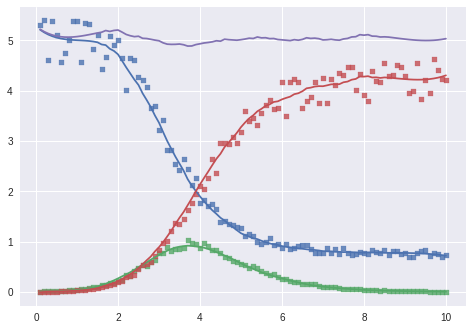

In [ ]:
ss = savgol_filter(S, 30, 3)
ii = savgol_filter(I, 30, 3)
rr = savgol_filter(R,30, 3)
plt.scatter(T, S, marker="s", s=25, alpha=0.8)
plt.scatter(T, I, marker="s", s=25, alpha=0.8)
plt.scatter(T, R, marker="s", s=25, alpha=0.8)
plt.plot(T, ss)
plt.plot(T, ii)
plt.plot(T, rr)
plt.plot(T, ss+ii+rr)


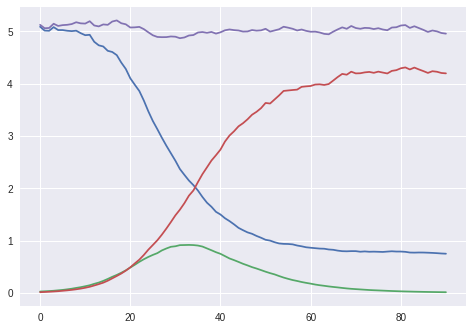

In [ ]:
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

sss = moving_average(S)
iii = moving_average(I)
rrr = moving_average(R)

plt.plot(sss)
plt.plot(iii)
plt.plot(rrr)
plt.plot(sss + iii + rrr)

In [ ]:
# preguntarle a servando si: podemos hacer un moving average y luego la red neuronal?